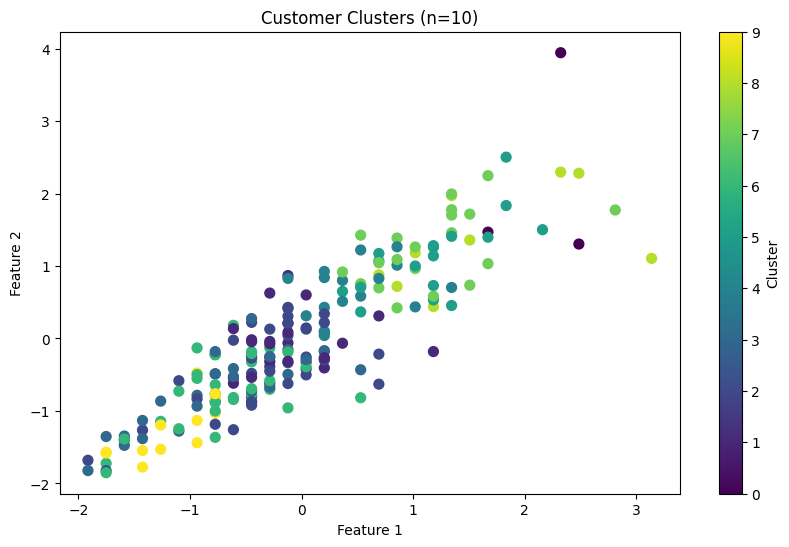

Clustering Report:

Number of Clusters Formed: 10
Lowest Davies-Bouldin Index: 0.63
Cluster Metrics:
 {2: 1.5723705420484042, 3: 1.2375772277732675, 4: 0.9475622901515466, 5: 0.7951610834130648, 6: 0.7754771100940682, 7: 0.730999859432755, 8: 0.7413809697581388, 9: 0.6462646383391264, 10: 0.6339866931798834}


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

transactions_path = 'Transactions.csv'
customers_path = 'Customers.csv'

transactions_df = pd.read_csv(transactions_path)
customers_df = pd.read_csv(customers_path)

# Merge transactions and customers datasets
merged_df = transactions_df.merge(customers_df, on='CustomerID', how='left')

# Aggregate data for each customer
customer_features = merged_df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'Region': 'first'  # Assuming region doesn't change
}).reset_index()

# Encode categorical features (e.g., Region)
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

# Feature Normalization
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features.iloc[:, 1:])

# Clustering
cluster_metrics = {}
optimal_clusters = 0
lowest_db_index = float('inf')

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_features)

    # Calculation of Davies-Bouldin Index
    db_index = davies_bouldin_score(normalized_features, cluster_labels)
    cluster_metrics[n_clusters] = db_index

    if db_index < lowest_db_index:
        lowest_db_index = db_index
        optimal_clusters = n_clusters

# Final Clustering with Optimal Clusters
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
final_labels = final_kmeans.fit_predict(normalized_features)
customer_features['Cluster'] = final_labels

# Visualization of Clusters
plt.figure(figsize=(10, 6))
plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c=final_labels, cmap='viridis', s=50)
plt.title(f'Customer Clusters (n={optimal_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Save clustering results
customer_features.to_csv('Customer_Clusters.csv', index=False)

# Report
print("Clustering Report:\n")
print(f"Number of Clusters Formed: {optimal_clusters}")
print(f"Lowest Davies-Bouldin Index: {lowest_db_index:.2f}")
print("Cluster Metrics:\n", cluster_metrics)
